# Priklad vyber autributov pomocou filtra a ukazka toho, preco PCA nie je vyber atributov

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['figure.figsize'] = 9, 6

# Skusme najskor priklad toho ako by sme z nejakeho datasetu vyberali najdolezitejsie atributy pomocou filtra

In [2]:
from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

In [4]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

Pouzijeme oblubeny dataset kvietkov ktory ma 150 pozorovani a 4 atributy

K nemu dogenerujeme 20 nahodnych atributov, ktore by mali mat len minimalny vplyv na predikciu zavyslej premennej

In [24]:
# vygenerujme si 20 uplne nahodnych atributov a pricapme ich k povodnym datam
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))

y = iris.target
X_indices = np.arange(X.shape[-1])
X_indices

X.shape

(150, 24)

Pre porovnanie sa pozireme na dva riadky povodnych a novych dat

In [11]:
# povodne data
iris.data[:2]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2]])

In [12]:
# data rozsirene o dalsich 20 nahodnych atributov
# len tie prve by mali davat zmysel
X[:2]

array([[  5.10000000e+00,   3.50000000e+00,   1.40000000e+00,
          2.00000000e-01,   4.63295380e-02,   5.41195663e-02,
          2.47562574e-02,   7.73932249e-02,   8.17357318e-03,
          3.41885278e-02,   3.28432211e-02,   4.04401304e-02,
          9.98119650e-02,   7.08531451e-03,   3.29896227e-02,
          8.59733535e-02,   2.17576999e-02,   3.97734404e-02,
          5.65239877e-02,   8.74660264e-02,   9.41745062e-02,
          5.36398116e-03,   1.48867601e-02,   4.35842319e-02],
       [  4.90000000e+00,   3.00000000e+00,   1.40000000e+00,
          2.00000000e-01,   4.16097656e-03,   9.13250609e-02,
          1.52547270e-02,   4.85534475e-02,   1.68833543e-02,
          5.67157648e-02,   2.88295106e-03,   2.97119057e-02,
          6.56537745e-02,   1.44930059e-02,   6.10111626e-02,
          7.53335281e-03,   3.19321990e-02,   2.48198943e-02,
          5.06954633e-02,   3.57753254e-02,   6.64901762e-03,
          6.54136311e-02,   9.89772557e-02,   3.84374352e-02]])

Mozeme skusit najst najdolezitejsie atributy. Mali by to byt prve 4

In [13]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)

SelectPercentile(percentile=10,
         score_func=<function f_classif at 0x7eff92a7bbf8>)

<Container object of 24 artists>

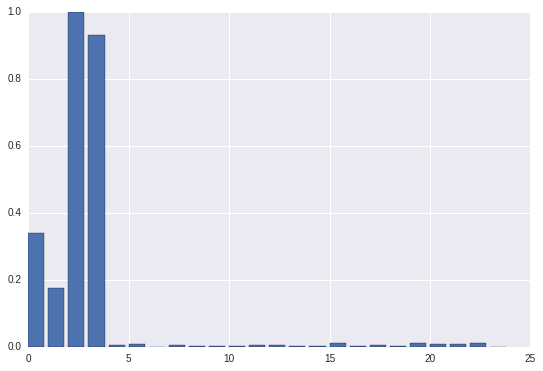

In [14]:
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores)

Naozaj sa nam podarilo najst tie data, ktore suviseli s predikovanou premennou.

Da sa na nieco podobne pouzit PCA?

# A case against PCA a.k.a. Nepouzivajte PCA na vyber atributov

PCA sa obycajne pouziva na redukciu atributov do mensieho poctu komponentov. Tu sa ale vyrabaju uplne nove komponenty (atributy), ktore su linearnymi kombinaciami tych povodnych 

In [14]:
from sklearn.decomposition import PCA

# Skusme pouzit PCA na zobrazenie toho, kolko potrebuje komponentov na vysvetlenie datasetu

pozor, hovorime o komponentoch ktore vznikli linearnou kombinaciou atributov a nie priamo o atributoch

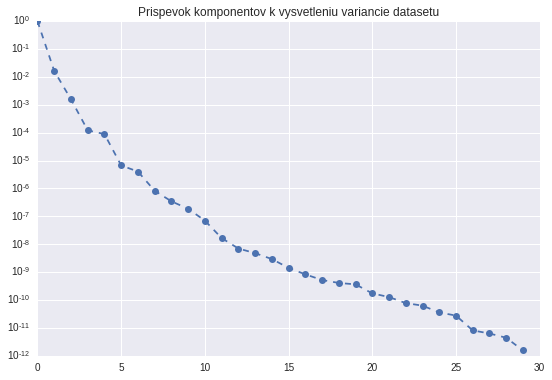

In [64]:
import sklearn.datasets as ds

data = ds.load_breast_cancer()['data']
pca_trafo = PCA().fit(data)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

line, = ax.plot(pca_trafo.explained_variance_ratio_, '--o')

ax.set_yscale('log') # skus si vyhodit logaritmicku mierku, uvidis, ze je tam asi problem
ax.set_title('Prispevok komponentov k vysvetleniu variancie datasetu')

# Mozeme skusit pouzit PCA na oznacenie tych atributov, ktore najviac prispievaju k variancii v datach

Zobrazime si heatmapu toho, ako silno prispievaju jednotlive vlastnosti k tvorbe komponentov a teda ako silno su v nich odrazene. To by nam malo vediet povedat, ktory atribut je vo vyslednych datach najviac odrazeny.

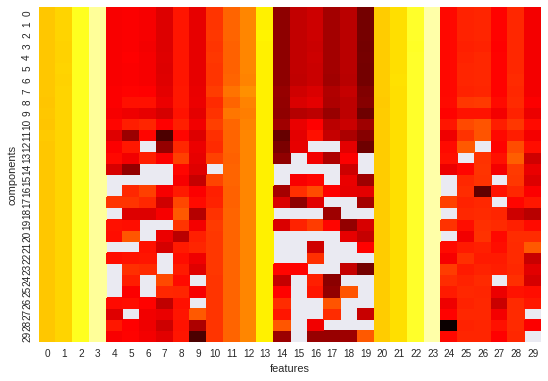

In [61]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA

pca_trafo = PCA()
data = ds.load_breast_cancer()['data']
pca_data = pca_trafo.fit_transform(data)

ax = seaborn.heatmap(np.log(pca_trafo.inverse_transform(np.eye(data.shape[1]))), cmap="hot", cbar=False)
ax.set_xlabel('features')
ax.set_ylabel('components')

matica nieje uplne nahodna ale su tam 3 pruhy, ktore zobrazuju 3 skupiny vlastnosti, ktore su v komponentoch odrazene vyraznejsie ako ostatne. Zda sa, ze toto su tie najdolezitejsie atributy.

# Mozeme si spocitat ich priemerny prispevok k vysvetleniu datasetu

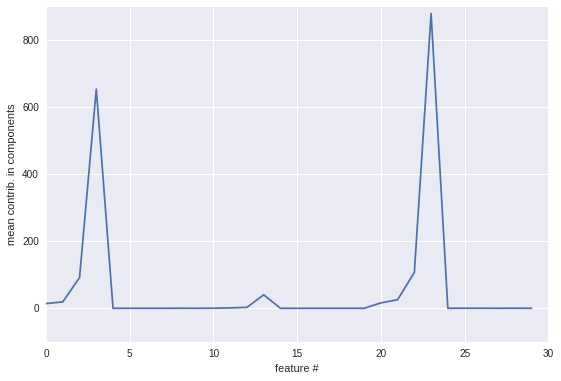

In [62]:
means = np.mean(pca_trafo.inverse_transform(np.eye(data.shape[1])), axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(means)
ax.set_ylabel('mean contrib. in components')
ax.set_xlabel('feature #')


# Zda sa, ze su tam nejake atributy, ktore su v tych komponentoch odrazene velmi silno. 

O co sa ale snazi PCA? Vysvetlit varianciu v datach. Skusme si teda vykreslit variancie vsetkych vlastnosti.

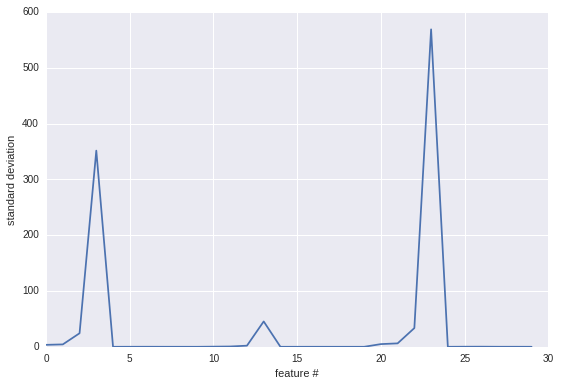

In [46]:
# PCA sa pokusa vysvetliv varianciu v datach. Ak ma kazdy atribut inu strednu hodnotu (varianciu), tak nevysvetli mnozstvo informacie v atribute ale len jeho varianciu
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.std(data, axis=0))
ax.set_ylabel('standard deviation')
ax.set_xlabel('feature #')
# ax.set_yscale('log')

# Tu sa nam asi nieco nezda

Pca nam vratilo prakticky to iste ako obycajne spocitanie variancie per atribut.

# Pri pouziti PCA je vzdy treba najskor normalizovat data
PCA sa snazi vysvetlit co najviac variancie v datach. Ak maju rozne atributy roznu varianciu, tak pri niektorych sa bude snazit viac. 

## Skusme spravit to iste ale predtym tie data normalizujeme

(0, 1.0)

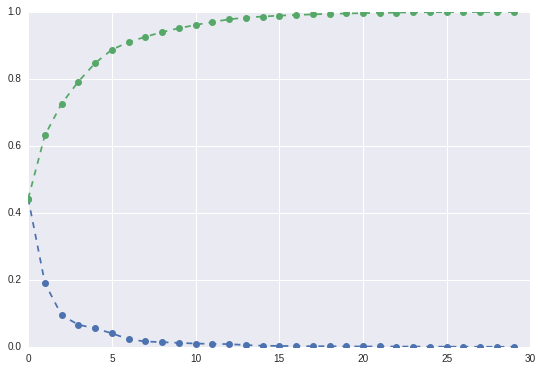

In [63]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # vykona z-normalizaciu na kazdom atribute

z_scaler = StandardScaler()
data = ds.load_breast_cancer()['data']

z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data)

plt.plot(pca_trafo.explained_variance_ratio_, '--o') # mnozstvo vysvetlenej variancie per atribut
plt.plot(pca_trafo.explained_variance_ratio_.cumsum(), '--o') # kumulativna suma vysvetlenej variancie ak si chcem vybrat atributy

plt.ylim((0,1.0))

# Teraz potrebujem trochu viac komponentov na to aby som vysvetlil rovnake mnozstvo variancie

Atributy maju asi vyrovnanejsi prispevok

Ako bude vyzerat ta heatmapa?

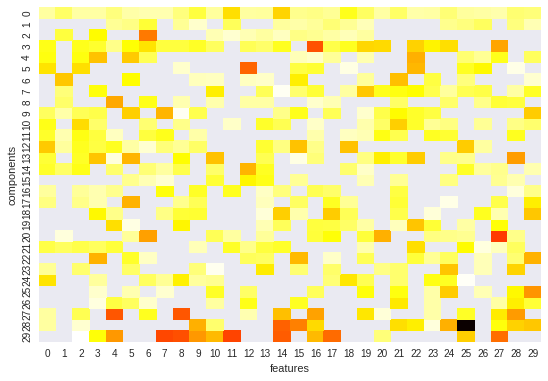

In [16]:
import sklearn.datasets as ds
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
data = ds.load_breast_cancer()['data']

pca_trafo = PCA()
z_data = z_scaler.fit_transform(data)
pca_data = pca_trafo.fit_transform(z_data)

ax = seaborn.heatmap(np.log(pca_trafo.inverse_transform(np.eye(data.shape[1]))), cmap="hot", cbar=False)
ax.set_xlabel('features')
ax.set_ylabel('components')

# Teraz ta heatmapa vyzera nahodne a neda sa jasne pouzit na urcenie najdolezitejsich vlastnosti

Mozeme si spocitat aj priemerny prispevok per atribut

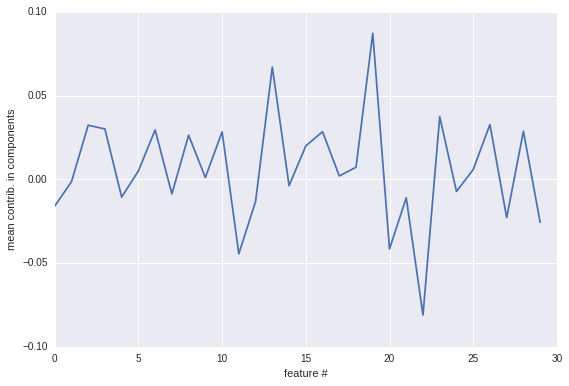

In [60]:
means = np.mean(pca_trafo.inverse_transform(np.eye(data.shape[1])), axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(means)
ax.set_ylabel('mean contrib. in components')
ax.set_xlabel('feature #')

# Po normalizovani dat sa priemrny prispevok pre vsetky atributy pohybuje tesne okolo 0. Neda as teda povedat ktory je najdolezitejsi a PCA nam povedalo len to, ktory ma najviac variancie. 

* Toto sa da spocitat aj podstatne jednoduchsie
* Neodraza to strukturu dat, ale len ich varianciu
* Pouzivanie PCA na feature selection teda nema velky zmysel. Na dimensionality reduction ale ano.
* Ak ale mate nejaku kategoricku predikovanu hodnotu, tak zvazte skor LDA

# Skusme si pozriet co nam vrati PCA na ten dataset z prikladu na zaciatku

In [17]:
iris = datasets.load_iris()
iris.data.shape

# vygenerujme si 20 uplne nahodnych atributov a pricapme ich k povodnym datam
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
X = np.hstack((iris.data, E))
y = iris.target

print('Tvar povodnych dat', iris.data.shape)
print('Tvar upravenych dat', X.shape)

X_indices = np.arange(X.shape[-1])

Tvar povodnych dat (150, 4)
Tvar upravenych dat (150, 24)


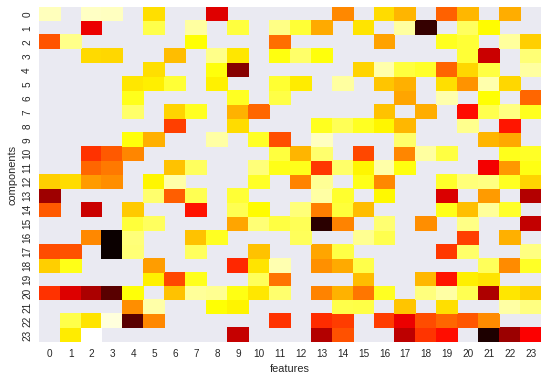

In [19]:
z_scaler = StandardScaler()

pca_trafo = PCA()
z_data = z_scaler.fit_transform(X)
pca_data = pca_trafo.fit_transform(z_data)

ax = seaborn.heatmap(np.log(pca_trafo.inverse_transform(np.eye(X.shape[1]))), cmap="hot", cbar=False)
ax.set_xlabel('features')
ax.set_ylabel('components')

Z tejto heatmapy sa neda vycitat ziadny jasny trend. Skusme este tie priemery prispevkov do komponentov per atribut.

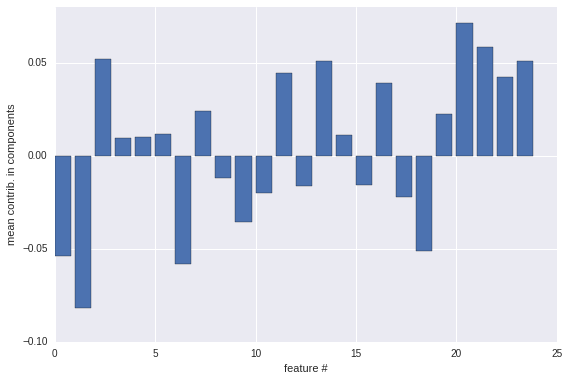

In [23]:
means = np.mean(pca_trafo.inverse_transform(np.eye(X.shape[1])), axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(X_indices, means)
ax.set_ylabel('mean contrib. in components')
ax.set_xlabel('feature #')

Toto vobec nevizera ako vysoke hodnoty dolezitosti pre prve 4 atributy a nizke pre ostatne. Toto vizera skor nahodne.

To znamena, ze PCA sa nesnazi najlepsie zakodovat atributy, ktore najviac suvusua s predikovanou hodnotou ale jednoducho tie, ktore maju v sebe najviac variancie. PCA sa v tomto pripade snazilo len co najlepsie komprimovat nahodne data.

Zistit kolko je variancie v jednotlivych atributoch moze byt zaujimave, ale da sa to zistit aj podstatne jednoduchsie ako pocitat PCA nad celym datasetom.

# Thus I rest my case

# Zdroje

* http://scikit-learn.org/stable/modules/feature_selection.html
* http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
* https://plot.ly/scikit-learn/plot-feature-selection/